In [42]:
import pandas as pd
import plotly.express as px
from kats.consts import TimeSeriesData
from kats.models.prophet import ProphetModel, ProphetParams

In [43]:
class ProphetForecaster:
    
    
    def __init__(
        self,df_path:str,
        date_col:str,
        value_col:str,
        prophet_params: dict
    ):
        
        self.date_col_name = date_col
        self.value_col_name = value_col
        self.prophet_params = prophet_params
        
        self.df = pd.read_csv(df_path,parse_dates=[self.date_col_name])
        
        self.ts_df = TimeSeriesData(
            self.df[
                [
                    self.date_col_name,
                    self.value_col_name
                ]
            ],
            time_col_name=self.date_col_name
        )
    
    
    def fit(self,pick_last_datapoints_num:int = None):
        
        train_data = None
        self.pick_last_datapoints_num = None
        
        if pick_last_datapoints_num is not None:
            
            self.pick_last_datapoints_num = pick_last_datapoints_num
            train_data = self.ts_df[-pick_last_datapoints_num:]
            
        else:
            
            train_data = self.ts_df
            
        self.prophet_model = ProphetModel(
            data=train_data,
            params=self.prophet_params
        )
        
        self.prophet_model.fit()
        
    def predict(self,step=48):
        
        self.forecast_df = self.prophet_model.predict(steps=step)
        
    def plot_predictions(self):
        
        identifier_col_name = 'label'
        input_df = self.df
        
        input_df[identifier_col_name] = 'unused'
        
        if self.pick_last_datapoints_num is not None:
            
            input_df[identifier_col_name].iloc[-self.pick_last_datapoints_num:] = 'train'
        
        forecast_renamed = self.forecast_df.rename(
            columns={
                'time': self.date_col_name,
                'fcst' : self.value_col_name
            }
        )
        
        forecast_renamed[identifier_col_name] = 'forecasted'
        
        new_df = pd.concat(
            [
                input_df,
                forecast_renamed
            ],
            axis=0
        )
    
        fig = px.line(
            new_df,
            x=self.date_col_name,
            y=self.value_col_name,
            color=identifier_col_name
        )
       
        fig.show()
    
        
        
       
        
        
        
        
        
        
        

In [44]:
prophet_params = ProphetParams(
    seasonality_mode='additive',
    yearly_seasonality=True
)

forecaster = ProphetForecaster(
    df_path='./datasets/trends1.csv',
    date_col='date',
    value_col='top 2',
    prophet_params=prophet_params

)

In [45]:
forecaster.fit(pick_last_datapoints_num=None)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/granite/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [46]:
forecaster.predict(step=96)

/home/granite/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/granite/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/granite/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/granite/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [47]:
forecaster.plot_predictions()

In [26]:
trends_df = pd.read_csv('./datasets/trends1.csv',parse_dates=['date'],usecols=['date','top 1','top 2','top 3'])


In [27]:
trends_df_top_one = TimeSeriesData(trends_df[['date','top 1']].iloc[-48:],time_col_name='date')
trends_df_top_two = TimeSeriesData(trends_df[['date','top 2']],time_col_name='date')
trends_df_top_three = TimeSeriesData(trends_df[['date','top 3']],time_col_name='date')

In [28]:
trends_df_top_one

,date,top 1
0,2016-11-06,18
1,2016-11-13,21
2,2016-11-20,25
3,2016-11-27,28
4,2016-12-04,18
5,2016-12-11,19
6,2016-12-18,21
7,2016-12-25,27
8,2017-01-01,20
9,2017-01-08,23


In [32]:
prophet_params = ProphetParams(
    seasonality_mode='additive',
    yearly_seasonality=True
)

In [33]:
m = ProphetModel(trends_df_top_one,prophet_params)
m.fit()
fcst = m.predict(steps=48,freq='W')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/granite/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/granite/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/granite/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/granite/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed fro

<AxesSubplot:xlabel='time'>

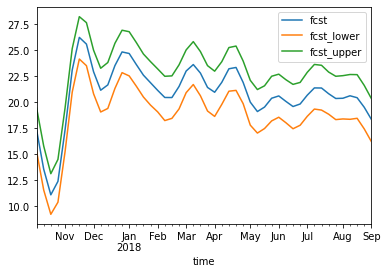

In [34]:
fcst.plot(x='time')

In [36]:
trend_top_one_df.

,top 1,date
0,4,2012-10-07
1,7,2012-10-14
2,5,2012-10-21
3,5,2012-10-28
4,4,2012-11-04
...,...,...
256,18,2017-09-03
257,17,2017-09-10
258,18,2017-09-17
259,19,2017-09-24


In [37]:
fcst.rename(
    columns={
        'time':'date',
        'fcst' : 'top 1'
    },
    inplace = True
)

In [40]:
new_df = pd.concat(
    [
        trend_top_one_df,
        fcst
    ],
    axis=0
)

In [42]:
new_df.assign()

TypeError: assign() takes 1 positional argument but 2 were given